                      Adaboost classifier from scratch
 AdaBoost algorithm, short for Adaptive Boosting, is a Boosting technique used as an Ensemble Method in Machine Learning. It is called Adaptive Boosting as the weights are re-assigned to each instance, with higher weights assigned to incorrectly classified instances.                     

In [27]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from mlxtend.plotting import plot_decision_regions


In [32]:
# create Adaboostclassifier class
class AdaBoostClassifier:
    def __init__(self, n_estimators=50):
        self.n_estimators = n_estimators
        self.alphas = []
        self.models = []

    def fit(self, X, y):
        n_samples, _ = X.shape
        # Initialize sample weights uniformly
        sample_weights = np.full(n_samples, 1 / n_samples)

        for _ in range(self.n_estimators):
            # Create and train a weak learner
            clf = DecisionTreeClassifier(max_depth=1)

            clf.fit(X, y, sample_weight=sample_weights)
            plot_tree(clf)
           # plot_decision_regions(X, y, clf=clf, legend=2)

            y_pred = clf.predict(X)


            # Compute weighted error
            err = np.sum(sample_weights * (y_pred != y)) / np.sum(sample_weights)
            
            # Stop if error is too high (or zero)
            if err > 0.5 or err == 0:
                continue

            # Compute alpha (learner weight)
            alpha = 0.5 * np.log((1 - err) / err)

            # Update sample weights
            sample_weights *= np.exp(-alpha * y * y_pred)
            sample_weights /= np.sum(sample_weights)  # Normalize

            # Save model and alpha
            self.models.append(clf)
            self.alphas.append(alpha)

    def predict(self, X):
        clf_preds = np.array([alpha * clf.predict(X) for clf, alpha in zip(self.models, self.alphas)])
        final_pred = np.sign(np.sum(clf_preds, axis=0))
        return final_pred

Accuracy: 0.95


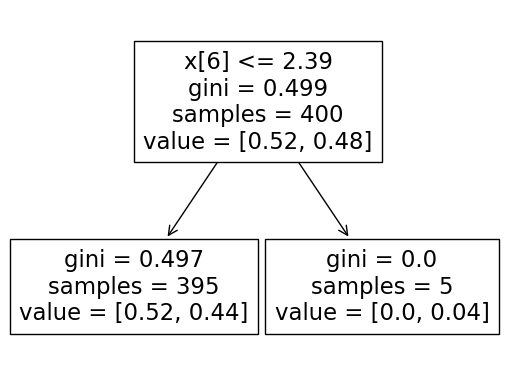

In [33]:
# Create a binary classification dataset
import seaborn as sns

X, y = make_classification(n_samples=500, n_features=10, random_state=42)

y = np.where(y == 0, -1, 1)  # Convert labels to {-1, 1} for AdaBoost

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

sns.scatterplot(x=X_train[0],y=X_train[1],hue=y_train[0])
     


# Train AdaBoost from scratch
model = AdaBoostClassifier(n_estimators=20)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

In [6]:
X_train.shape

(400, 10)

In [8]:
X_train

array([[-0.95332861, -0.23750768, -0.48274352, ..., -0.64596418,
        -0.30316601,  0.12267032],
       [-0.75849533,  0.82112066,  0.032797  , ...,  0.34378788,
         0.25349798, -0.23040071],
       [-2.48780866,  1.01252284,  1.41853135, ..., -0.62773391,
         0.72704782,  1.27696539],
       ...,
       [ 0.49774309,  0.82422661,  0.23007076, ..., -0.32066763,
        -0.64576922,  0.66592425],
       [-0.42811516, -2.25236397, -1.5565819 , ...,  0.99626682,
        -1.93901355,  1.50075979],
       [-0.03582558,  1.49366259, -1.11158025, ...,  0.6870658 ,
         0.76715669, -0.53145455]])

In [14]:
y_train[1]

-1

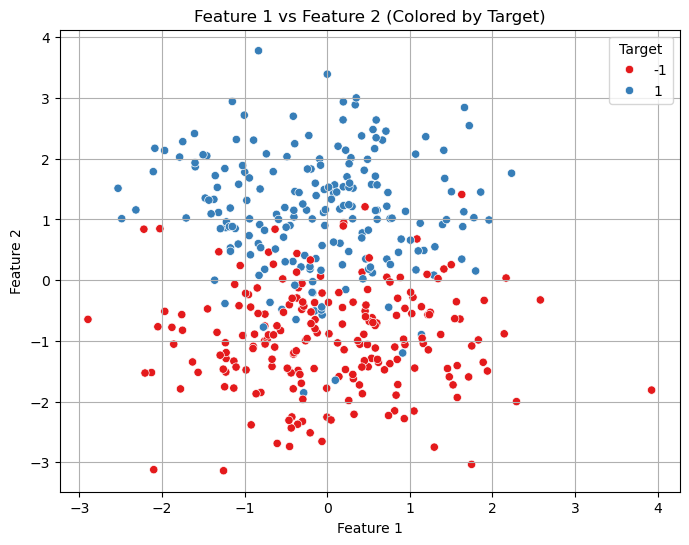

In [19]:
#plot the data point before fit with Adaboost
import pandas as pd
import matplotlib.pyplot as plt
df = pd.DataFrame(X_train[:, :2], columns=['Feature 1', 'Feature 2'])
df['Target'] = y_train

# Create scatterplot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Feature 1', y='Feature 2', hue='Target', palette='Set1')
plt.title('Feature 1 vs Feature 2 (Colored by Target)')
plt.grid(True)
plt.show()

In [34]:
#with scikit-learn library
from sklearn.ensemble import AdaBoostClassifier


In [37]:
X, y = make_classification(n_samples=500, n_features=10, random_state=42)

y = np.where(y == 0, -1, 1)  # Convert labels to {-1, 1} for AdaBoost

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)


In [38]:
model = AdaBoostClassifier(n_estimators=20)
model.fit(X_train, y_train)
# Predict and evaluate
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.91
